<a href="https://colab.research.google.com/github/kainspraveen/Local-Global-Attention-Network/blob/main/alzheimers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [1]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-addons

!nvidia-smi

     |████████████████████████████████| 1.1 MB 36.3 MB/s 
Wed Nov 17 18:05:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                              

# Data Input from Drive

In [3]:
!unzip "/content/drive/MyDrive/ADNI.zip"

Archive:  /content/drive/MyDrive/ADNI.zip
   creating: ADNI/
  inflating: ADNI/.DS_Store          
  inflating: __MACOSX/ADNI/._.DS_Store  
   creating: ADNI/ADNI_2yr_3T/
   creating: ADNI/ADNI_2yr_3T_images/
  inflating: __MACOSX/ADNI/._ADNI_2yr_3T_images  
  inflating: ADNI/ADNI_2yr_3T/.DS_Store  
  inflating: __MACOSX/ADNI/ADNI_2yr_3T/._.DS_Store  
   creating: ADNI/ADNI_2yr_3T/ADNI-metadata/
  inflating: ADNI/ADNI_2yr_3T/ADNI1_Annual_2_Yr_3T_10_02_2021.csv  
  inflating: __MACOSX/ADNI/ADNI_2yr_3T/._ADNI1_Annual_2_Yr_3T_10_02_2021.csv  
   creating: ADNI/ADNI_2yr_3T_images/130_S_0505/
  inflating: __MACOSX/ADNI/ADNI_2yr_3T_images/._130_S_0505  
   creating: ADNI/ADNI_2yr_3T_images/051_S_1331/
  inflating: __MACOSX/ADNI/ADNI_2yr_3T_images/._051_S_1331  
   creating: ADNI/ADNI_2yr_3T_images/005_S_0814/
  inflating: __MACOSX/ADNI/ADNI_2yr_3T_images/._005_S_0814  
   creating: ADNI/ADNI_2yr_3T_images/032_S_1169/
  inflating: __MACOSX/ADNI/ADNI_2yr_3T_images/._032_S_1169  
   creating: A

In [4]:
!unzip "/content/drive/MyDrive/ADNI_Gene_Expression_Profile.zip"

Archive:  /content/drive/MyDrive/ADNI_Gene_Expression_Profile.zip
   creating: ADNI_Gene_Expression_Profile/
  inflating: __MACOSX/._ADNI_Gene_Expression_Profile  
  inflating: ADNI_Gene_Expression_Profile/ADNI_Gene_Expression_Profile_DICT.csv  
  inflating: __MACOSX/ADNI_Gene_Expression_Profile/._ADNI_Gene_Expression_Profile_DICT.csv  
  inflating: ADNI_Gene_Expression_Profile/ADNI_Gene_Expression_Profile.csv  
  inflating: __MACOSX/ADNI_Gene_Expression_Profile/._ADNI_Gene_Expression_Profile.csv  


In [ ]:
!unzip "/content/drive/MyDrive/ADNI1_Complete_2Yr_3T.zip"
!unzip "/content/drive/MyDrive/ADNI1_Complete_1Yr_3T.zip"
!unzip "/content/drive/MyDrive/ADNI1_Complete_3Yr_3T.zip"
!unzip "/content/drive/MyDrive/ADNI_3T_Baseline.zip"
!unzip "/content/drive/MyDrive/3T_labels_data.zip"


Archive:  /content/drive/MyDrive/ADNI1_Complete_2Yr_3T.zip
  inflating: ADNI/023_S_0058/MPR__GradWarp__B1_Correction__N3__Scaled/2005-12-12_12_29_36.0/S10498/ADNI_023_S_0058_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061130133702940_S10498_I30968.nii  
  inflating: ADNI/023_S_0058/MPR__GradWarp__B1_Correction__N3__Scaled/2006-06-13_11_13_49.0/S15504/ADNI_023_S_0058_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061130135622775_S15504_I30979.nii  
  inflating: ADNI/023_S_0061/MPR__GradWarp__B1_Correction__N3__Scaled/2005-12-20_15_54_41.0/S10633/ADNI_023_S_0061_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061130182551088_S10633_I31107.nii  
  inflating: ADNI/023_S_0376/MPR__GradWarp__B1_Correction__N3__Scaled/2006-04-28_12_55_22.0/S13786/ADNI_023_S_0376_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061201170258692_S13786_I31392.nii  
  inflating: ADNI/023_S_0388/MPR__GradWarp__B1_Correction__N3__Scaled/2006-05-04_15_27_08.0/S14001/ADNI_023_S_0388_MR_MPR__GradWarp__B1_Corre

In [6]:
#!unzip "/content/drive/MyDrive/gene_data.zip"

Archive:  /content/drive/MyDrive/gene_data.zip
   creating: gene_data/
   creating: gene_data/ADNI_Gene_Expression_Profile/
  inflating: __MACOSX/gene_data/._ADNI_Gene_Expression_Profile  
  inflating: gene_data/.DS_Store     
  inflating: __MACOSX/gene_data/._.DS_Store  
   creating: gene_data/WGS_Omni2/
  inflating: __MACOSX/gene_data/._WGS_Omni2  
   creating: gene_data/ADNI_1_GWAS_Plink/
  inflating: __MACOSX/gene_data/._ADNI_1_GWAS_Plink  
  inflating: gene_data/ADNI_Gene_Expression_Profile/ADNI_Gene_Expression_Profile_DICT.csv  
  inflating: __MACOSX/gene_data/ADNI_Gene_Expression_Profile/._ADNI_Gene_Expression_Profile_DICT.csv  
  inflating: gene_data/ADNI_Gene_Expression_Profile/ADNI_Gene_Expression_Profile.csv  
  inflating: __MACOSX/gene_data/WGS_Omni2/._WGS_Omni25_BIN_wo_ConsentsIssues.bed.txt  
  inflating: gene_data/WGS_Omni2/WGS_Omni25_BIN_wo_ConsentsIssues.fam  
  inflating: __MACOSX/gene_data/WGS_Omni2/._WGS_Omni25_BIN_wo_ConsentsIssues.fam  
  inflating: gene_data/WGS_

In [7]:
!unzip "/content/drive/MyDrive/"

unzip:  cannot find or open /content/drive/MyDrive/, /content/drive/MyDrive/.zip or /content/drive/MyDrive/.ZIP.


In [1]:
import os
folder1="./ADNI/ADNI_2yr_3T_images/"
folder2 = './ADNI/ADNI_2yr_3T/'
folder3 = './ADNI'
folder4 = './ADNI_3T_Baseline'
img_files = []
metadata_files = []
import glob
count=0
#/content/ADNI/ADNI_2yr_3T_images/005_S_0324/MPR-R__GradWarp__B1_Correction__N3__Scaled
for f in glob.glob(folder3+'**/*/*/*/*/*.nii', recursive=True):
    count+=1
    print(f)
    img_files.append(f)
count2=0
"""for f in glob.glob(folder3+'**/*/*/*/*/*', recursive=True):
    count+=1
    print(f)
    img_files.append(f)"""
print(count, count2)
    

./ADNI_3T_Baseline/082_S_0928/MPR__GradWarp__B1_Correction__N3__Scaled/2006-10-16_12_54_09.0/S50770/ADNI_082_S_0928_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080613154501166_S50770_I109533.nii
./ADNI_3T_Baseline/005_S_0553/MPR__GradWarp__B1_Correction__N3__Scaled/2006-06-28_12_11_17.0/S15928/ADNI_005_S_0553_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061212135745131_S15928_I32755.nii
./ADNI_3T_Baseline/002_S_1268/MPR-R____N3__Scaled/2007-03-07_07_58_51.0/S27680/ADNI_002_S_1268_MR_MPR-R____N3__Scaled_Br_20070806174712233_S27680_I65268.nii
./ADNI_3T_Baseline/067_S_1253/MPR__GradWarp__B1_Correction__N3__Scaled/2007-03-30_07_22_36.0/S29241/ADNI_067_S_1253_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080111161437659_S29241_I87150.nii
./ADNI_3T_Baseline/116_S_0382/MPR__GradWarp__B1_Correction__N3__Scaled/2006-06-13_10_21_56.0/S15735/ADNI_116_S_0382_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070508153859326_S15735_I53802.nii
./ADNI_3T_Baseline/005_S_0602/MPR__GradWarp__B

In [2]:
#Images
import skimage.transform as skTrans
from nibabel.testing import data_path
import nibabel as nib
import numpy as np


################################################################################

#Metadata | Labels
import pandas as pd
loc = "./ADNI/ADNI_2yr_3T/ADNI1_Annual_2_Yr_3T_10_02_2021.csv"
loc2 = "/content/ADNI1_Baseline_3T_11_11_2021.csv"
loc3 = "/content/ADNI1_Complete_1Yr_3T_11_11_2021.csv"
loc4 = "/content/ADNI1_Complete_3Yr_3T_11_11_2021.csv"
loc5 = "/content/ADNI1_Complete_2Yr_3T_11_11_2021.csv"
df = pd.read_csv(loc)
dic = {}
img_id = list(df['Image Data ID'])
group = list(df['Group'])

del df

df2 = pd.read_csv(loc2)
img_id+=list(df2['Image Data ID'])
group+=list(df2['Group'])
del df2



df3 = pd.read_csv(loc3)
img_id+=list(df3['Image Data ID'])
group+=list(df3['Group'])

del df3

df4 = pd.read_csv(loc4)
img_id+=list(df4['Image Data ID'])
group+=list(df4['Group'])

del df4

df5 = pd.read_csv(loc5)
img_id+=list(df5['Image Data ID'])
group+=list(df5['Group'])

del df5

for i in range(len(group)):
    dic[img_id[i]] = group[i]
print("SIZES OF IMG_ID, GROUP, DIC",len(img_id), len(group), len(dic))
print(img_files[0], len(img_files))
print(img_id[:10])
dic2 = {}
dic2['MCI'] = 1
dic2['CN'] = 0
dic2['AD'] = 2
labels = []

for i in img_files:
    li = list(i.split('/'))
    #print(dic[i[6]], dic2[dic[i[6]]])
    try:
        labels.append(dic2[dic[li[6]]])
    except:
        li = list(i.split('/'))
        li=li[-1]
        li = list(li.split('_'))
        li = li[-1]
        labels.append(dic2[dic[li[:-4]]])
        print(i, li)


#print(labels[:10])


c = [0,0,0]
for i in labels:
    if(i==0):
        c[0]+=1
    elif(i==1):
        c[1]+=1
    elif(i==2):
        c[2]+=1
max_count = max(c[0], c[1], c[2])
print("intitial : ", c)

################################################################################


import random
from scipy import ndimage

angles = [-20, -10, -5, 5, 10, 20]

img = nib.load(img_files[0])
data = img.get_fdata()
print(data.shape)
print(type(data))
#img_list = np.ndarray(shape = (128,128,110), dtype = 'float')
img_list = []
new_labels = []
#skipped_files_index = []
for i, files in enumerate(img_files):
    
    img = nib.load(files)
    try:
        data = img.get_fdata()
    except:
        #skipped_files_index.append(i)
        continue
    offset = (data.shape[-1]-110)//2
    #print("data shape : ", data.shape, offset)
    data = skTrans.resize(data, (100,100), order=1, preserve_range=True)[:,:,offset:-1*offset]
    img_list.append(np.array(data))
    if(labels[i]==2):
        new_labels.append(labels[i])
    else:
        new_labels.append(1)


    #OVER SAMPLING SMALL SAMPLES 

    if(c[labels[i]]<max_count):
        angle = random.choice(angles)
        rotated_img = ndimage.rotate(data, angle, reshape=False) 
        img_list.append(rotated_img)
        c[labels[i]]+=1
        if(labels[i]==2):
            new_labels.append(labels[i])
        else:
            new_labels.append(1)
    #print(data.shape)

print("final : ", len(img_list))


SIZES OF IMG_ID, GROUP, DIC 1710 1710 635
./ADNI_3T_Baseline/082_S_0928/MPR__GradWarp__B1_Correction__N3__Scaled/2006-10-16_12_54_09.0/S50770/ADNI_082_S_0928_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080613154501166_S50770_I109533.nii 785
['I31392', 'I105848', 'I35014', 'I118679', 'I40378', 'I118916', 'I53836', 'I119725', 'I65268', 'I120476']
./ADNI_3T_Baseline/082_S_0928/MPR__GradWarp__B1_Correction__N3__Scaled/2006-10-16_12_54_09.0/S50770/ADNI_082_S_0928_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080613154501166_S50770_I109533.nii I109533.nii
./ADNI_3T_Baseline/005_S_0553/MPR__GradWarp__B1_Correction__N3__Scaled/2006-06-28_12_11_17.0/S15928/ADNI_005_S_0553_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061212135745131_S15928_I32755.nii I32755.nii
./ADNI_3T_Baseline/002_S_1268/MPR-R____N3__Scaled/2007-03-07_07_58_51.0/S27680/ADNI_002_S_1268_MR_MPR-R____N3__Scaled_Br_20070806174712233_S27680_I65268.nii I65268.nii
./ADNI_3T_Baseline/067_S_1253/MPR__GradWarp__B1_Correction

In [3]:
print("final list length : ", len(img_list))


final list length :  1055


# Data Process and Prep for program

In [4]:
from sklearn.utils import shuffle
import numpy as np
img_list = np.array(img_list)
new_labels = np.array(new_labels)
img_list, new_labels = shuffle(img_list, new_labels)
x_train, x_val, x_test = img_list[:int(img_list.shape[0]*0.7)], img_list[int(img_list.shape[0]*0.7):int(img_list.shape[0]*0.85)], img_list[int(img_list.shape[0]*0.85):]
y_train, y_val, y_test = new_labels[:int(img_list.shape[0]*0.7)], new_labels[int(img_list.shape[0]*0.7):int(img_list.shape[0]*0.85)], new_labels[int(img_list.shape[0]*0.85):]
#print(len(x_train), x_train[0].shape, y_train.shape)



c = [0,0,0]
for i in y_train:
    if(i==0):
        c[0]+=1
    elif(i==1):
        c[1]+=1
    elif(i==2):
        c[2]+=1
print("Train : ", c)
c = [0,0,0]
for i in y_test:
    if(i==0):
        c[0]+=1
    elif(i==1):
        c[1]+=1
    elif(i==2):
        c[2]+=1
print("Test : ", c)


del img_list


Train :  [0, 541, 197]
Test :  [0, 121, 38]


In [5]:
y_train, y_test = y_train.reshape((y_train.shape[0],1)), y_test.reshape((y_test.shape[0],1))

In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(738, 100, 100, 110) (738, 1)
(159, 100, 100, 110) (159, 1)


In [7]:
print(x_train.shape, x_test.shape, x_val.shape)
x_train, y_train = shuffle(x_train, y_train)
x_val, y_val = shuffle(x_val, y_val)
x_test, y_test = shuffle(x_test, y_test)

(738, 100, 100, 110) (159, 100, 100, 110) (158, 100, 100, 110)


# Model Architecture

Image size: 100 X 100
Patch size: 6 X 6
Patches per image: 256
Elements per patch: 3960
patches shape :  (1, 256, 3960)


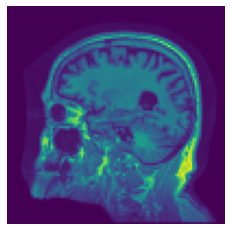

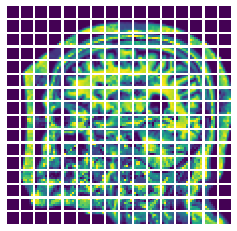

In [8]:
#Vi-Transformer Implementation
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras import layers
import tensorflow_addons as tfa
import tensorflow as tf

#Example for CIFAR-100

num_classes=2
input_shape=(100,100,110)

#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

"""
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)"""


#Configure Hyper Parameters
lr=1e-2
weight_decay= 1e-3
batch_size=256
num_epochs=100
image_size=100 #resize images (32,32,3) to (72,72,3)
patch_size=6
num_patches = (image_size//patch_size)**2
projection_dim=128
num_heads=4


transformer_units=[projection_dim*2, projection_dim ] #size of transformer layer

transformer_layers=8
mlp_head_units=[2048, 1024]


#Data Augmentation as Keras Layer

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.3, width_factor=0.3)
     
    ],
    name='data_augmentation'
)

#data_augmentation.layers[0].adapt(x_train)


#MLP (Multi Layer Perceptron)
def mlp(x, hidden_units, dropout):
    for units in hidden_units:
        x=layers.Dense(units, activation=tf.nn.gelu)(x)
        x=layers.Dropout(dropout)(x)
    return x

#patch Creation as Layer

class Patches(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(Patches, self).__init__(**kwargs)
        self.patch_size=patch_size

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'patch_size': self.patch_size,
        })
        return config

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides = [1, self.patch_size, self.patch_size, 1],
            rates= [1,1,1,1],
            padding= 'VALID'
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1,patch_dims])
        return patches


#display patches for an image
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
#image=x_train[np.random.choice(range(x_train.shape[0]))]
image= x_train[0]
plt.imshow(image[:,:,30])
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)

patches=Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")
print("patches shape : ", patches.shape)


n=int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4,4))

for i, patch in enumerate(patches[0]):
    
    ax=plt.subplot(n,n,i+1)
    patch_img=tf.reshape(patch, (patch_size, patch_size, 110))
    #print(patch_img)
    #break
    plt.imshow(patch_img.numpy()[:,:,30].astype('int32'))
    plt.axis('off')

#pacth encoding Layer

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwargs):
        super(PatchEncoder, self).__init__(**kwargs)
        self.num_patches=num_patches
        self.projection=layers.Dense(units=projection_dim, activation = tf.nn.gelu)
        self.position_embedding = layers.Embedding(
            input_dim =num_patches, output_dim = projection_dim
        )
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_patches': self.num_patches,
            'projection': self.projection,
            'position_embedding': self.position_embedding,
        })
        return config

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch)+self.position_embedding(positions)
        return encoded

class Reshape3D(layers.Layer):
    def __init__(self, width, height, channels):
        super(Reshape3D, self).__init__()
        self.width = width
        self.height = height
        self.channels = channels

    def call(self, img):
        temp =  tf.reshape(img, (self.width, self.height, self.channels, 1))

        return temp

#build the Vi-T model

#consists of multiple transformer blocks

def create_vit_classifier():

    inputs=layers.Input(shape=input_shape)


    #augment data
    augmented = data_augmentation(inputs)
    #create patches
    patches = Patches(patch_size)(augmented)

    #encode patches
    temp=PatchEncoder(num_patches,projection_dim)(patches)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)
    #create multiple layrs of the transformer block

    for _ in range(transformer_layers):
        #layer normalization
        x1=layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output=layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.1)(x1,x1)
        #skip connection 1
        x2=layers.Add()([attention_output, encoded_patches])
        #layer normalization 2

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout=0.1)
        #skip connection 2
        encoded_patches = layers.Add()([x3, x2])

    #create a [batch_size, projection_dim] tensor

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    #add mlp

    model = keras.Model(inputs=inputs, outputs = representation)
    return model

    


(None, 16, 128)
(None, 4, 128)
(None, 9, 128)
encoded_patches :  (None, 320, 128)
encoded_patches :  (None, 336, 128)
encoded_patches :  (None, 340, 128)
encoded_patches :  (None, 349, 128)
(None, 349, 128)
(None, 44672)
(None, 45662)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                10)]                                                              
                                                                                                  
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                10)]                                                              
                                                         

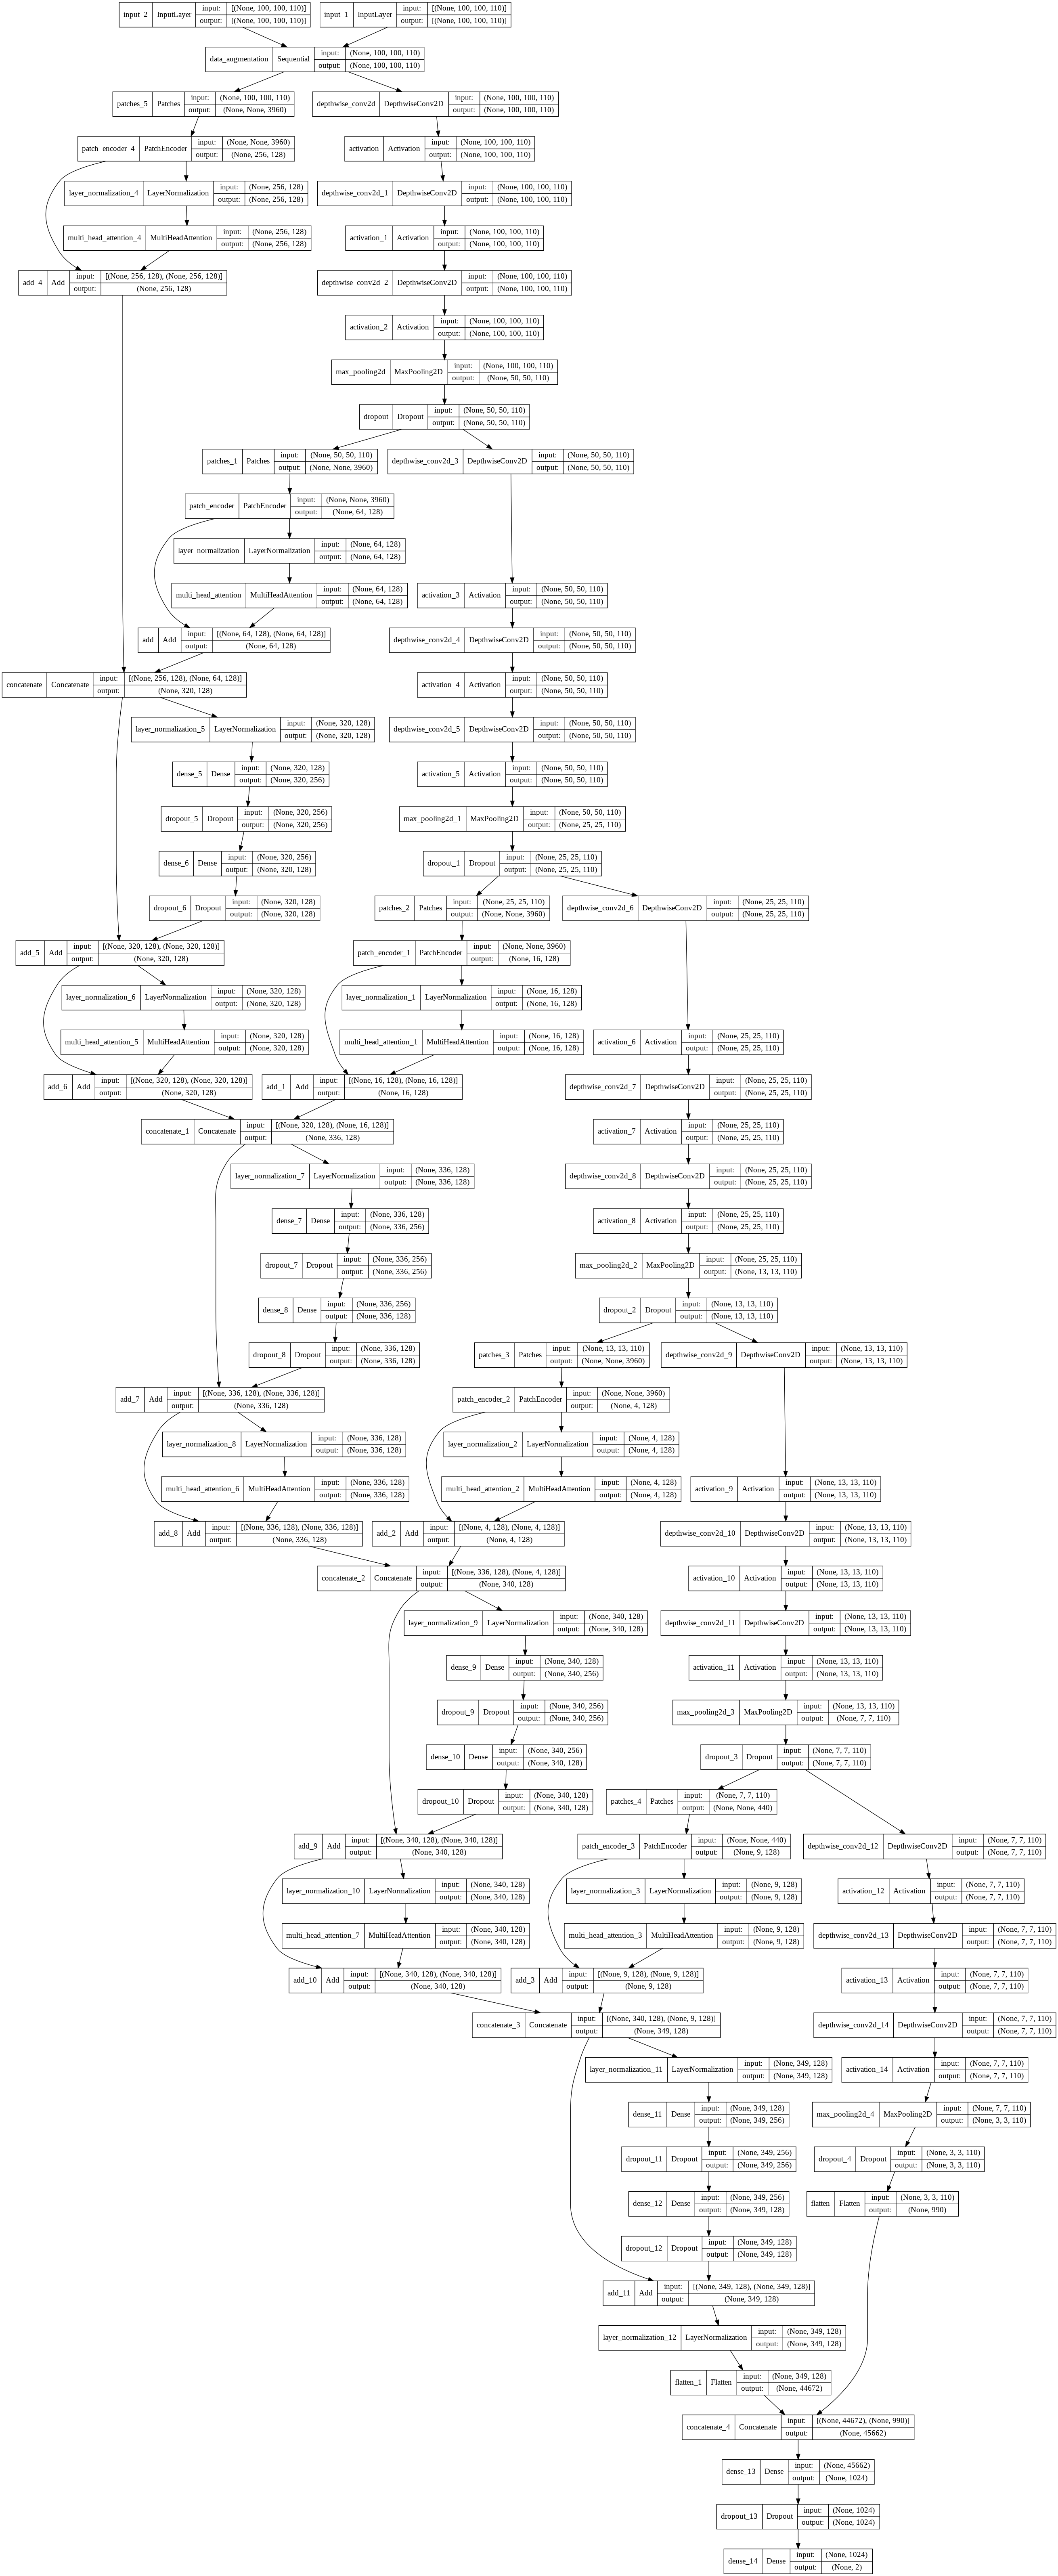

In [9]:
#Progressive Fusion Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense,DepthwiseConv2D, GlobalMaxPooling2D, Conv2D, MaxPooling2D, Dropout, Add, LayerNormalization, Flatten, AveragePooling2D, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras.utils import plot_model

from tensorflow.keras import layers
from tensorflow.keras import activations



def progressive_fusion_v2():
    input_size=(100,100,110)
    inputs = keras.layers.Input(shape=input_size)
    augmented = data_augmentation(inputs)

    dic={}


    conv1 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(augmented)
    #batch=BatchNormalization(epsilon=1e-6)(conv1)
    batch=layers.Activation(activations.relu)(conv1)
    conv2 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    conv2 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    #conv3 = Conv2D(32, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv3)
    #batch=layers.Activation(activations.relu)(conv3)
    #skip=Add()([conv1, batch])

    pool1 = MaxPooling2D(pool_size=(2, 2), padding='same')(batch)
    #x1=LayerNormalization(epsilon=1e-6)(pool1)
    drop1=Dropout(0.2)(pool1)

    patches_1 = Patches(patch_size)(drop1)
    patch_encoder_1 = PatchEncoder((50//patch_size)**2, projection_dim)(patches_1)
    norm1 = layers.LayerNormalization(epsilon=1e-6)(patch_encoder_1)
    norm1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.2)(norm1,norm1)
    norm1 = layers.Add()([norm1, patch_encoder_1])
    dic['patch_encoder1']=norm1





    conv4 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(drop1)
    #batch=BatchNormalization(epsilon=1e-6)(conv4)
    batch=layers.Activation(activations.relu)(conv4)
    conv2 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    conv5 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv5)
    batch=layers.Activation(activations.relu)(conv5)
    #conv6 = Conv2D(32, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv6)
    #batch=layers.Activation(activations.relu)(conv6)
    #skip=Add()([conv4, batch])

    pool2 = MaxPooling2D(pool_size=(2, 2), padding='same')(batch)
    #x2=LayerNormalization(epsilon=1e-6)(pool2)
    drop2 = Dropout(0.2)(pool2)

    patches_2 = Patches(patch_size)(drop2)
    patch_encoder_2 = PatchEncoder((25//patch_size)**2, projection_dim)(patches_2)
    norm2 = layers.LayerNormalization(epsilon=1e-6)(patch_encoder_2)
    norm2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.2)(norm2,norm2)
    norm2 = layers.Add()([norm2, patch_encoder_2])
    dic['patch_encoder2']=norm2
    print(norm2.shape)


    conv7 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(drop2)
    #batch=BatchNormalization(epsilon=1e-6)(conv7)
    batch=layers.Activation(activations.relu)(conv7)
    conv2 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    conv8 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv8)
    batch=layers.Activation(activations.relu)(conv8)
    #conv9 = Conv2D(32, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv9)
    #batch=layers.Activation(activations.relu)(conv9)

    #skip=Add()([conv7, batch])
    pool3 = MaxPooling2D(pool_size=(2, 2), padding='same')(batch)
    #x3=LayerNormalization(epsilon=1e-6)(pool3)
    drop3 = Dropout(0.2)(pool3)

    patches_3 = Patches(patch_size)(drop3)
    patch_encoder_3 = PatchEncoder((13//(patch_size))**2, projection_dim)(patches_3)
    norm3 = layers.LayerNormalization(epsilon=1e-6)(patch_encoder_3)
    norm3 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.2)(norm3,norm3)
    norm3 = layers.Add()([norm3, patch_encoder_3])
    dic['patch_encoder3']=norm3
    print(norm3.shape)




    conv9 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(drop3)
    #batch=BatchNormalization(epsilon=1e-6)(conv9)
    batch=layers.Activation(activations.relu)(conv9)
    conv2 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    conv10 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv10)
    batch=layers.Activation(activations.relu)(conv10)
    #conv11 = Conv2D(32, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv11)
    #batch=layers.Activation(activations.relu)(conv11)
    #skip=Add()([conv9, batch])
    pool4 = MaxPooling2D(pool_size=(2, 2), padding='same')(batch)
    #x4=LayerNormalization(epsilon=1e-6)(pool4)
    drop4 = Dropout(0.2)(pool4)

    patches_4 = Patches(patch_size//2-1)(drop4)
    #print("patches_4 shape ", patches_4.shape)
    patch_encoder_4 = PatchEncoder((7//(patch_size//2-1))**2, projection_dim)(patches_4)
    #print("PAtch_encoder_4 input, output : ", patch_encoder.input_shape, patch_encoder.output_shape)
    norm4 = layers.LayerNormalization(epsilon=1e-6)(patch_encoder_4)
    norm4 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.2)(norm4,norm4)
    norm4 = layers.Add()([norm4, patch_encoder_4])
    dic['patch_encoder4']=norm4
    print(norm4.shape)





    conv11 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(drop4)
    #batch=BatchNormalization(epsilon=1e-6)(conv11)
    batch=layers.Activation(activations.relu)(conv11)
    conv2 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    conv12 = DepthwiseConv2D(kernel_size = 3, depth_multiplier=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv12)
    batch=layers.Activation(activations.relu)(conv12)
    #conv13 = Conv2D(32, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv13)
    #batch=layers.Activation(activations.relu)(conv13)

    #skip=Add()([conv11, batch])
    #x5=LayerNormalization(epsilon=1e-6)(skip)
    pool5=MaxPooling2D(pool_size=(2,2))(batch)
    drop4 = Dropout(0.2)(pool5)

    


    x=layers.Flatten()(drop4)
    #x=layers.Dense(1024, activation='relu')(x)
    #x=layers.Dense(100, activation='relu')(x)
    






    inputs_trans=layers.Input(shape=input_shape)
    #augment data
    augmented_1 = data_augmentation(inputs_trans)
    #create patches
    patches = Patches(patch_size)(augmented_1)

    #encode patches
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)
    #create multiple layrs of the transformer block



    for i in range(transformer_layers-4): #to match cnn blocks = 5
        #layer normalization
        x1=layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output=layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.2)(x1,x1)
        
        #skip connection 1
        x2=layers.Add()([attention_output, encoded_patches])
        #layer normalization 2
        #print("Add Shape : ", x2.shape)
        #print("patch_encoder from cnn shape : ", dic['patch_encoder'+str(i+1)].shape)
        x2 = layers.Concatenate(axis = 1)([x2, dic['patch_encoder'+str(i+1)]])

        #print("concatenate shape : ", x2.shape)

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout=0.2)
        #skip connection 2
        #print("mlp xhape : ", x3.shape)
        encoded_patches = layers.Add()([x3, x2])
        print("encoded_patches : ", encoded_patches.shape)
        #print("\n\n\n")

    #create a [batch_size, projection_dim] tensor
    #print(encoded_patches.shape)
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    print(representation.shape)
    representation = layers.Flatten()(representation)
    print(representation.shape)
    #representation = layers.Dropout(0.2)(representation)
    #representation = layers.Dense(1024, activation='relu')(representation)
    #representation = layers.Dense(100, activation='relu')(representation)


    #print(representation.shape)
    combined=layers.Concatenate()([representation, x])
    print(combined.shape)
    combined=mlp(combined, hidden_units=[1024], dropout=0.3)
    logits=Dense(2, activation = 'softmax')(combined)



    #add mlp

    #features = mlp(representation, hidden_units=mlp_head_units, dropout=0.5)
    #classify outputs

    #logits = layers.Dense(num_classes)(features)

    model = keras.Model(inputs=[inputs_trans, inputs] , outputs = logits)
    return model



progressive_model_v2 = progressive_fusion_v2()
progressive_model_v2.summary()

plot_model(progressive_model_v2, to_file="new_model.png", show_shapes=True)
#progressive_model_v2.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-2), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")] )
plot_model(progressive_model_v2, to_file="new_model.png", show_shapes=True)

In [12]:
progressive_model_v2.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.Accuracy(name="acc")] )
tf.keras.backend.clear_session()

# Model Training

In [1]:

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_acc', patience = 25, mode = 'auto', restore_best_weights= True)

checkpoint_filepath = "/content/drive/MyDrive/"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    validation_data = ([x_test, x_test], y_test))

#history = progressive_model_v3.fit([x_train, x_train], y_train, batch_size=128, epochs=150, verbose =1, callbacks=[model_checkpoint_callback, history_logger], validation_data = ([x_test, x_test], y_test))

history = progressive_model_v2.fit([x_train, x_train], y_train, batch_size=32, epochs=250, verbose =1, callbacks = [model_checkpoint_callback, earlystop_callback], validation_data = ([x_val, x_val], y_val))




NameError: ignored

In [21]:
print("EValuation Epoch result : ")
print(progressive_model_v2.evaluate([x_val, x_val], y_val))

print("Testing Result : ")
print( progressive_model_v2.evaluate([x_test, x_test], y_test))

EValuation Epoch result : 
5/5 [==============================] - 1s 145ms/step - loss: 0.3220 - acc: 0.9051
[0.32198667526245117, 0.905063271522522]
Testing Result : 


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 2s 147ms/step - loss: 0.3974 - acc: 0.9057
[0.3973691761493683, 0.9056603908538818]


In [22]:
progressive_model_v2.load_weights("/content/drive/MyDrive/")


In [23]:
print("EValuation Epoch result : ")
print(progressive_model_v2.evaluate([x_val, x_val], y_val))

print("Testing Result : ")
print( progressive_model_v2.evaluate([x_test, x_test], y_test))

EValuation Epoch result : 
5/5 [==============================] - 1s 146ms/step - loss: 0.3220 - acc: 0.9051
[0.32198667526245117, 0.905063271522522]
Testing Result : 


InternalError: ignored

# Only CNN model

In [26]:
# cnn model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense,DepthwiseConv2D, GlobalMaxPooling2D, Conv2D, MaxPooling2D, Dropout, Add, LayerNormalization, Flatten, AveragePooling2D, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras.utils import plot_model

from tensorflow.keras import layers
from tensorflow.keras import activations


def cnn_model():
    input_size=(100,100,110)
    inputs = keras.layers.Input(shape=input_size)
    #augmented = data_augmentation(inputs)

    dic={}


    conv1 = Conv2D(filters = 32, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    #batch=BatchNormalization(epsilon=1e-6)(conv1)
    batch=layers.Activation(activations.relu)(conv1)
    conv2 = Conv2D(filters = 32, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    conv2 = Conv2D(filters = 32, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    #conv3 = Conv2D(32, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv3)
    #batch=layers.Activation(activations.relu)(conv3)
    #skip=Add()([conv1, batch])

    pool1 = MaxPooling2D(pool_size=(2, 2), padding='same')(batch)
    #x1=LayerNormalization(epsilon=1e-6)(pool1)
    drop1=Dropout(0.2)(pool1)







    conv4 = Conv2D(filters = 64, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(drop1)
    #batch=BatchNormalization(epsilon=1e-6)(conv4)
    batch=layers.Activation(activations.relu)(conv4)
    conv2 = Conv2D(filters = 64, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    conv5 = Conv2D(filters = 64, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv5)
    batch=layers.Activation(activations.relu)(conv5)
    #conv6 = Conv2D(32, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv6)
    #batch=layers.Activation(activations.relu)(conv6)
    #skip=Add()([conv4, batch])

    pool2 = MaxPooling2D(pool_size=(2, 2), padding='same')(batch)
    #x2=LayerNormalization(epsilon=1e-6)(pool2)
    drop2 = Dropout(0.2)(pool2)




    conv7 = Conv2D(filters = 128, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(drop2)
    #batch=BatchNormalization(epsilon=1e-6)(conv7)
    batch=layers.Activation(activations.relu)(conv7)
    conv2 = Conv2D(filters = 128, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    conv8 = Conv2D(filters = 128, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv8)
    batch=layers.Activation(activations.relu)(conv8)
    #conv9 = Conv2D(32, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv9)
    #batch=layers.Activation(activations.relu)(conv9)

    #skip=Add()([conv7, batch])
    pool3 = MaxPooling2D(pool_size=(2, 2), padding='same')(batch)
    #x3=LayerNormalization(epsilon=1e-6)(pool3)
    drop3 = Dropout(0.2)(pool3)






    conv9 = Conv2D(filters = 256, kernel_size=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(drop3)
    #batch=BatchNormalization(epsilon=1e-6)(conv9)
    batch=layers.Activation(activations.relu)(conv9)
    conv2 = Conv2D(filters = 256, kernel_size=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    conv10 = Conv2D(filters = 256, kernel_size=1, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv10)
    batch=layers.Activation(activations.relu)(conv10)
    #conv11 = Conv2D(32, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv11)
    #batch=layers.Activation(activations.relu)(conv11)
    #skip=Add()([conv9, batch])
    pool4 = MaxPooling2D(pool_size=(2, 2), padding='same')(batch)
    #x4=LayerNormalization(epsilon=1e-6)(pool4)
    drop4 = Dropout(0.2)(pool4)

    





    conv11 = Conv2D(filters = 512, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(drop4)
    #batch=BatchNormalization(epsilon=1e-6)(conv11)
    batch=layers.Activation(activations.relu)(conv11)
    conv2 = Conv2D(filters = 512, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv2)
    batch=layers.Activation(activations.relu)(conv2)
    conv12 = Conv2D(filters = 512, kernel_size=3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv12)
    batch=layers.Activation(activations.relu)(conv12)
    #conv13 = Conv2D(32, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(batch)
    #batch=BatchNormalization(epsilon=1e-6)(conv13)
    #batch=layers.Activation(activations.relu)(conv13)

    #skip=Add()([conv11, batch])
    #x5=LayerNormalization(epsilon=1e-6)(skip)
    pool5=MaxPooling2D(pool_size=(2,2))(batch)
    drop4 = Dropout(0.2)(pool5)

    


    x=layers.GlobalAveragePooling2D()(drop4)
    combined = Dense(1024, activation=tf.nn.gelu)(x)
    #combined = Dense(2048, activation = tf.nn.gelu)(combined)
    #combined = Dense(800, activation = tf.nn.gelu)(combined)
    logits=Dense(3)(combined)

    model = keras.Model(inputs=[inputs] , outputs = logits)
    return model

cnn_model = cnn_model()
cnn_model.summary()

    

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 110)]   0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      31712     
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 100, 100, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 activation_2 (Activation)   (None, 100, 100, 32)      0     

In [27]:
cnn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")] )
tf.keras.backend.clear_session()

In [28]:

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 35, mode = 'auto', restore_best_weights= True)


#history = progressive_model_v3.fit([x_train, x_train], y_train, batch_size=128, epochs=150, verbose =1, callbacks=[model_checkpoint_callback, history_logger], validation_data = ([x_test, x_test], y_test))

history = cnn_model.fit(x_train, y_train, batch_size=32, epochs=250, verbose =1, validation_data = (x_val, y_val))


Epoch 1/250
24/24 [==============================] - 22s 227ms/step - loss: 216.3638 - acc: 0.3618 - val_loss: 47.4723 - val_acc: 0.3924
Epoch 2/250
24/24 [==============================] - 3s 116ms/step - loss: 86.3409 - acc: 0.3740 - val_loss: 34.8690 - val_acc: 0.3987
Epoch 3/250
24/24 [==============================] - 3s 116ms/step - loss: 59.3596 - acc: 0.3740 - val_loss: 24.3089 - val_acc: 0.3987
Epoch 4/250
24/24 [==============================] - 3s 116ms/step - loss: 44.1500 - acc: 0.3618 - val_loss: 21.3937 - val_acc: 0.3861
Epoch 5/250
24/24 [==============================] - 3s 117ms/step - loss: 44.0602 - acc: 0.3604 - val_loss: 13.2586 - val_acc: 0.4051
Epoch 6/250
24/24 [==============================] - 3s 117ms/step - loss: 37.3841 - acc: 0.3415 - val_loss: 16.2310 - val_acc: 0.3987
Epoch 7/250
24/24 [==============================] - 3s 118ms/step - loss: 32.5852 - acc: 0.3401 - val_loss: 13.6597 - val_acc: 0.3924
Epoch 8/250
24/24 [==============================] - 

KeyboardInterrupt: ignored

# Model Analysis and Evaluation

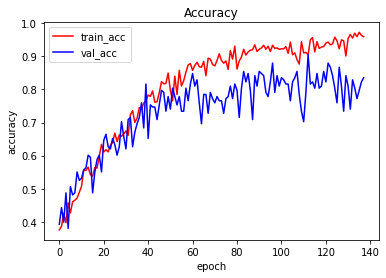

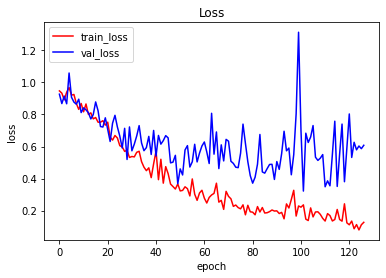

In [24]:
from matplotlib import pyplot as plt

plt.plot(history.history['acc'],color='red')
plt.plot(history.history['val_acc'], color = 'blue')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()


plt.plot(history.history['loss'][11:],color='red')
plt.plot(history.history['val_loss'][11:], color ='blue')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# Final Study

In [ ]:
!unzip "/content/drive/MyDrive/ADNI1_Complete_1Yr_1.5T_11_10_2021.csv"

Archive:  /content/drive/MyDrive/ADNI1_Complete_1Yr_1.5T_11_10_2021.csv.zip
  inflating: ADNI1_Complete_1Yr_1.5T_11_10_2021.csv  
  inflating: __MACOSX/._ADNI1_Complete_1Yr_1.5T_11_10_2021.csv  


# MISC

In [14]:
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

gene_data_loc = "./ADNI_Gene_Expression_Profile/ADNI_Gene_Expression_Profile.csv"
labels_loc = "./ADNI/ADNI_2yr_3T/ADNI1_Annual_2_Yr_3T_10_02_2021.csv"
labels_loc2 = './ADNI1_Complete_1Yr_1.5T_11_10_2021.csv'

gene_data = pd.read_csv(gene_data_loc)
labels_data = pd.read_csv(labels_loc)
#print(labels_data.head)
subject1 = list(labels_data['Subject'])
print(len(subject1))
group1 = list(labels_data['Group'])
print(len(group1))
labels_data2 = pd.read_csv(labels_loc2)
subject2 = list(labels_data2['Subject'])
print(len(subject2))
group2 = list(labels_data2['Group'])
print(len(group2))
dic2= {}

dic2['CN'] = 0
dic2['MCI'] = 1
dic2['AD'] = 2

subject = subject1+subject2
group = group1+group2
dic = {}
for i in  range(len(subject)):
    if(subject[i] not in dic):
        dic[subject[i]]=dic2[group[i]]
    else:
        try:
            
            dic[subject[i]] = max(dic[subject[i]], dic2[group[i]])
        except:
            print(i, len(subject), len(group))


#print(dic)

gene_data=gene_data.drop(columns = ['Unnamed: 1', 'Unnamed: 2'])
subject_list = np.array(gene_data[1:2]).squeeze()[1:]

#print(subject_list)
gene_data=gene_data.rename(columns=gene_data.iloc[1])
gene_data=gene_data[8:]

#print(gene_data['116_S_1249'])
gene_array = []
gene_array_labels = []
for id in subject_list:
    if(id in dic):
        gene_array.append(np.array(gene_data[id]))
        gene_array_labels.append(dic[id])
#print(gene_data.shape)
gene_data = gene_data.transpose()
#print(gene_data.shape)
print(len(gene_array))
print(len(gene_array_labels))
print(len(set(subject2)),"%%%")
gene_array = np.array(gene_array).astype('float32')
gene_array_labels = np.array(gene_array_labels)
print("Before PCA : ", gene_array.shape)
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
gene_array = pca.fit_transform(gene_array)
print("After PCA : ", gene_array.shape)

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense,DepthwiseConv2D, GlobalMaxPooling2D, Conv2D, MaxPooling2D, Dropout, Add, LayerNormalization, Flatten, AveragePooling2D, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras.utils import plot_model

from tensorflow.keras import layers
from tensorflow.keras import activations




input_size=(gene_array.shape[1])
inputs = keras.layers.Input(shape=input_size)
dense1 = Dense(2048, activation = tf.nn.gelu)(inputs)
#dense2 = Dense(5196, activation = tf.nn.gelu)(dense1)
dense2 = Dense(512, activation = tf.nn.gelu)(dense1)
#dense2 = Dense(512, activation = tf.nn.gelu)(dense2)
#dense2 = Dense(512, activation = tf.nn.gelu)(dense2)

logits = Dense(3, activation='softmax')(dense2)

model = keras.Model(inputs = inputs, outputs = logits)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")] )





history = model.fit(gene_array[:30], gene_array_labels[:30], epochs = 150, verbose = 1, validation_data = (gene_array[30:], gene_array_labels[30:]))







from matplotlib import pyplot as plt

plt.plot(history.history['acc'],color='red')
plt.plot(history.history['val_acc'], color = 'blue')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()


plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'], color ='blue')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253

306
306


FileNotFoundError: ignored

In [ ]:
print(model.predict(gene_array[30:]).argmax(axis=1)
model.predict(gene_array[30:])

[1 1 1 1 1 0 1 0 0]


array([[1.4042580e-01, 8.5957420e-01, 4.2355317e-35],
       [2.8762957e-03, 9.9712366e-01, 3.4161629e-32],
       [4.6527213e-01, 5.3472781e-01, 3.7911847e-29],
       [2.5238466e-04, 9.9974757e-01, 8.1534803e-38],
       [1.4331339e-05, 9.9998569e-01, 0.0000000e+00],
       [9.9533927e-01, 4.6607521e-03, 8.6255856e-38],
       [1.8820009e-08, 1.0000000e+00, 0.0000000e+00],
       [9.9556655e-01, 4.4334289e-03, 0.0000000e+00],
       [9.9254805e-01, 7.4519338e-03, 1.8557491e-27]], dtype=float32)

In [ ]:
!pip install pandas-plink





In [ ]:
import numpy as np
from bed_reader import open_bed, sample_file
from pandas_plink import read_plink1_bin
import pandas as pd

G = read_plink1_bin("/content/gene_data/WGS_Omni2/WGS_Omni25_BIN_wo_ConsentsIssues.bed", "/content/gene_data/WGS_Omni2/WGS_Omni25_BIN_wo_ConsentsIssues.bim", "/content/gene_data/WGS_Omni2/WGS_Omni25_BIN_wo_ConsentsIssues.fam", verbose=True)

df = pd.DataFrame(G)

Mapping files: 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]
